In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [3]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_dA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [6]:
df_DA_US = df_DA_US.explode('job_skills')

In [22]:
df_dist = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_dist

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
workfront,3,75000.00
wrike,1,75000.00
xamarin,0,NaN


In [32]:
df_top_pay = df_dist.sort_values(by = 'median', ascending=False).head(10)
df_top_skills = df_dist.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False).head(10)

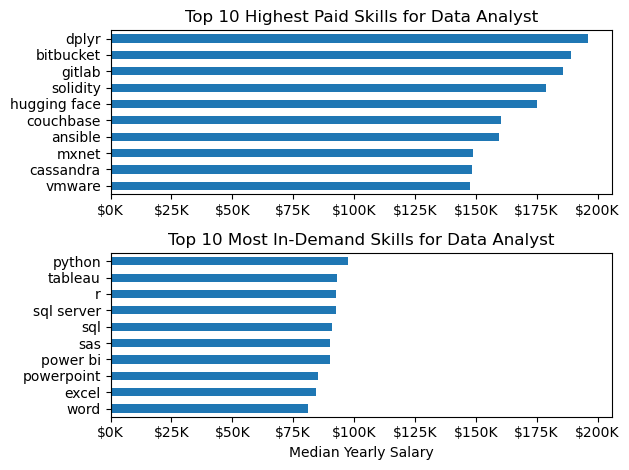

In [41]:
fig, ax = plt.subplots(2,1)

df_top_pay.plot(kind='barh',y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

df_top_skills[::-1].plot(kind='barh',y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()
